# Introduction

### About Columns :

**Diabetes_binary** : you have diabetes (0,1)

**HighBP** : Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional (0,1)

**HighChol** : Have you EVER been told by a doctor, nurse or other health professional that your blood cholesterol is high? (0,1)

**CholCheck** : Cholesterol check within past five years (0,1)

**BMI** : Body Mass Index (BMI)

**Smoker** : Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] (0,1)

**Stroke** : (Ever told) you had a stroke. (0,1)

**HeartDiseaseorAttack** : Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI) (0,1)

**PhysActivity** : Adults who reported doing physical activity or exercise during the past 30 days other than their regular job (0,1)

**Fruits** : Consume Fruit 1 or more times per day (0,1)

**Veggies** : Consume Vegetables 1 or more times per day (0,1)

**HvyAlcoholConsump** : Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)(0,1)

**AnyHealthcare** : Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service? (0,1)

**NoDocbcCost** : Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? (0,1)

**GenHlth** : Would you say that in general your health is: rate (1 ~ 5)

**MentHlth** : Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? (0 ~ 30)

**PhysHlth** : Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0 ~ 30)

**DiffWalk** : Do you have serious difficulty walking or climbing stairs? (0,1)

**Sex** : Indicate sex of respondent (0,1) (Female or Male)

**Age** : Fourteen-level age category (1 ~ 14)

**Education** : What is the highest grade or year of school you completed? (1 ~ 6)

**Income** : Is your annual household income from all sources: (If respondent refuses at any income level, code "Refused.") (1 ~ 8)

# Import Libraries

In [500]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from pandas_profiling import ProfileReport

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

from imblearn.under_sampling import NearMiss

from tensorflow.keras.optimizers.legacy import Adam
from tensorflow import keras
from keras import layers
from tensorflow import nn

# Data Exploring

In [501]:
data = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")

### Dataset Report

In [502]:
# profile = ProfileReport(data)
# profile

In [503]:
data.shape

(253680, 22)

In [504]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [505]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [506]:
data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


# Preprocessing

### Check and drop dublicated data

In [507]:
data.duplicated().sum()

24206

In [508]:
data.drop_duplicates(inplace = True)

In [509]:
data.duplicated().sum()

0

In [510]:
data.shape

(229474, 22)

# EDA

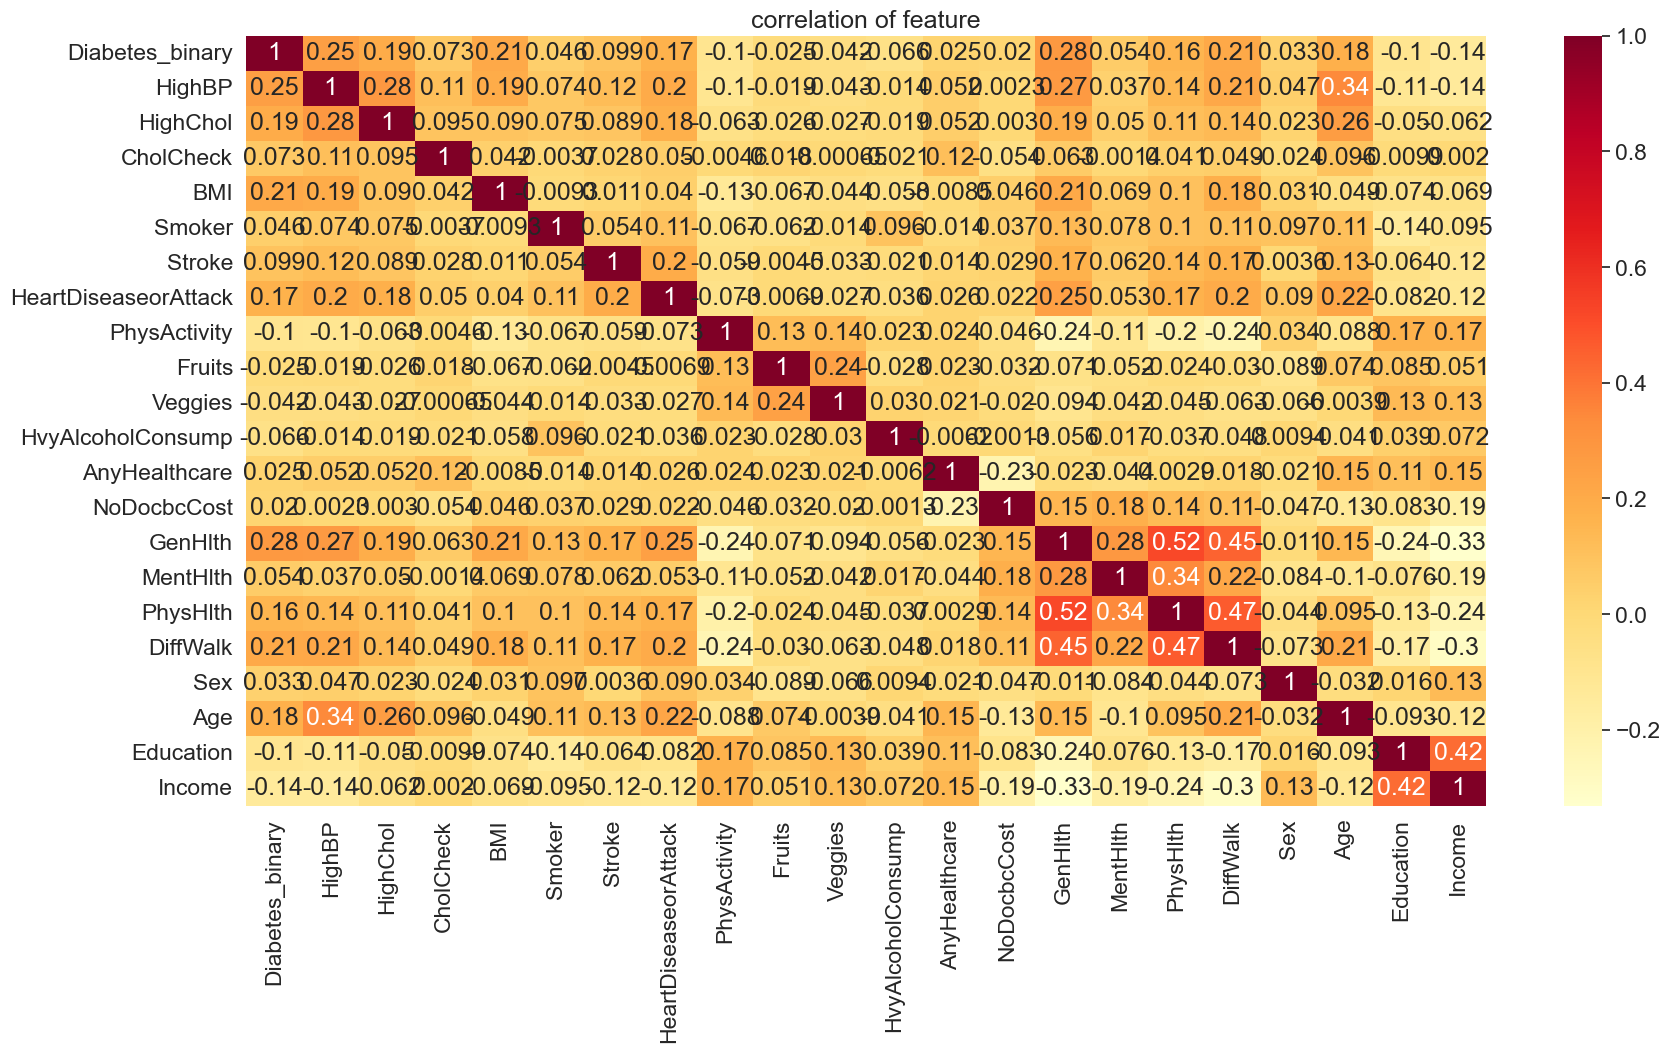

In [511]:

plt.figure(figsize = (20,10))
sns.heatmap(data.corr(),annot=True , cmap ='YlOrRd' )
plt.title("correlation of feature")
plt.show()


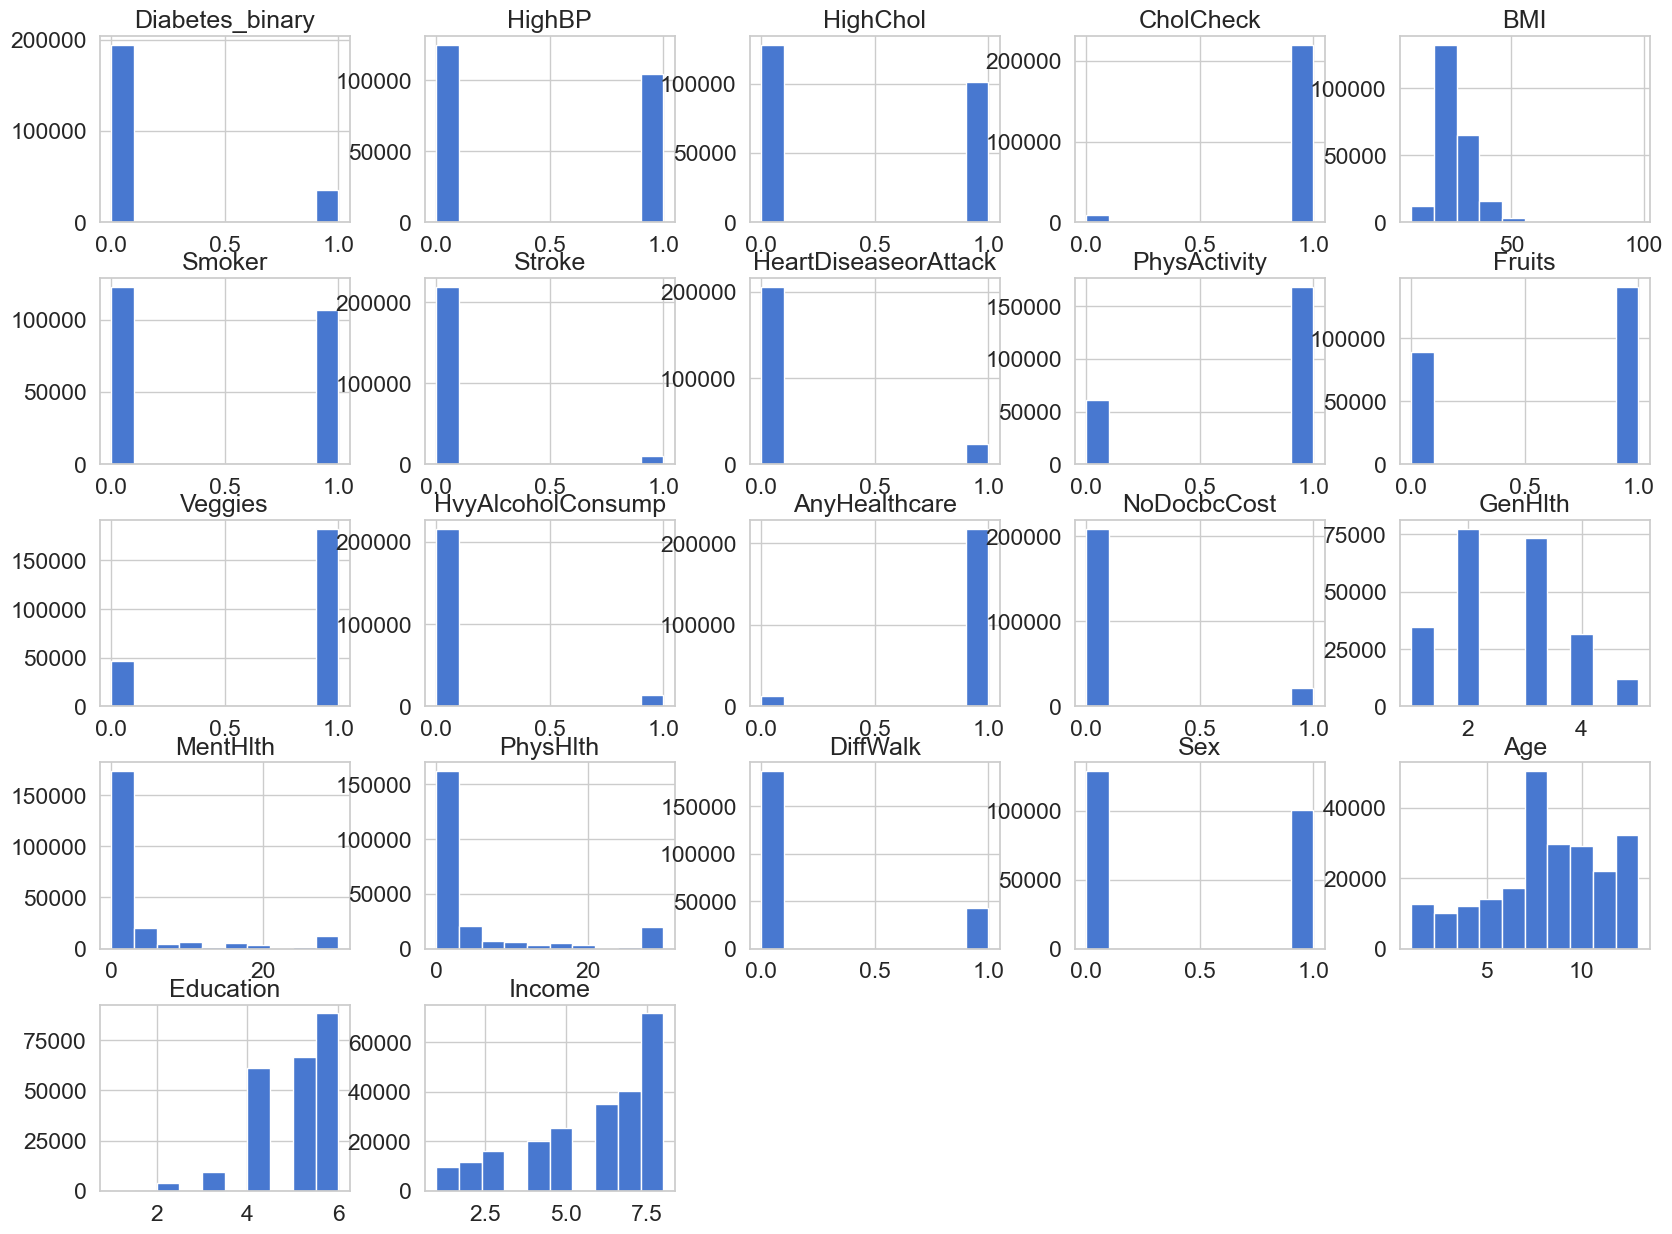

In [512]:
data.hist(figsize=(20,15));

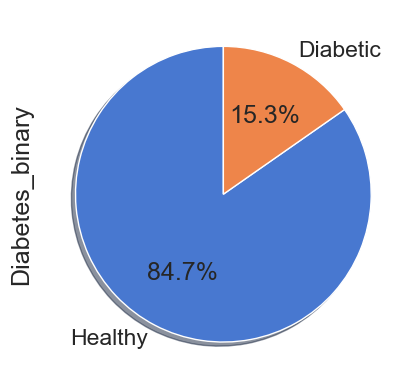

In [513]:
labels = 'Healthy','Diabetic'

data.Diabetes_binary.value_counts().plot.pie(labels=labels, autopct='%1.1f%%',shadow=True, startangle=90);

# Data Splitting

In [514]:
X=data.drop("Diabetes_binary",axis=1)
Y=data["Diabetes_binary"]

# Dealing with imbalancing

In [515]:
Y.value_counts()

0.0    194377
1.0     35097
Name: Diabetes_binary, dtype: int64

In [516]:
nm = NearMiss(version = 1 , n_neighbors = 10)

x_sm,y_sm= nm.fit_resample(X,Y)

In [517]:
y_sm.shape , x_sm.shape

((70194,), (70194, 21))

In [518]:
X_train , X_test , y_train , y_test = train_test_split(x_sm,y_sm, test_size=0.2 , random_state=42)

# Modeling

## Neural Network 

In [519]:
input_shape = X.shape
num_classes = 1

In [520]:
model = keras.Sequential([
    layers.InputLayer(input_shape=(21,)),
    layers.BatchNormalization(),
    layers.Dense(units=256, activation=nn.relu),
    layers.BatchNormalization(),
    layers.Dense(units=512, activation=nn.relu),
    layers.BatchNormalization(),
    layers.Dense(units=256, activation=nn.relu),
    layers.BatchNormalization(),
    layers.Dense(units=1, activation=nn.sigmoid)
])

opt = Adam()
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [521]:
model.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_26 (Bat  (None, 21)               84        
 chNormalization)                                                
                                                                 
 dense_110 (Dense)           (None, 256)               5632      
                                                                 
 batch_normalization_27 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dense_111 (Dense)           (None, 512)               131584    
                                                                 
 batch_normalization_28 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                     

In [522]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)

Epoch 1/20


2023-02-11 17:13:14.222883: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1755/1755 [==============================] - ETA: 0s - loss: 0.3776 - accuracy: 0.8301

2023-02-11 17:13:44.533743: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1755/1755 [==============================] - 33s 18ms/step - loss: 0.3776 - accuracy: 0.8301 - val_loss: 0.3241 - val_accuracy: 0.8613
Epoch 2/20
1755/1755 [==============================] - 30s 17ms/step - loss: 0.3441 - accuracy: 0.8481 - val_loss: 0.3222 - val_accuracy: 0.8603
Epoch 3/20
1755/1755 [==============================] - 30s 17ms/step - loss: 0.3385 - accuracy: 0.8523 - val_loss: 0.3215 - val_accuracy: 0.8584
Epoch 4/20
1755/1755 [==============================] - 31s 17ms/step - loss: 0.3285 - accuracy: 0.8570 - val_loss: 0.3103 - val_accuracy: 0.8662
Epoch 5/20
1755/1755 [==============================] - 31s 18ms/step - loss: 0.3244 - accuracy: 0.8597 - val_loss: 0.3065 - val_accuracy: 0.8698
Epoch 6/20
1755/1755 [==============================] - 30s 17ms/step - loss: 0.3199 - accuracy: 0.8608 - val_loss: 0.3114 - val_accuracy: 0.8666
Epoch 7/20
1755/1755 [==============================] - 29s 16ms/step - loss: 0.3176 - accuracy: 0.8632 - val_loss: 0.3075 - val_accura

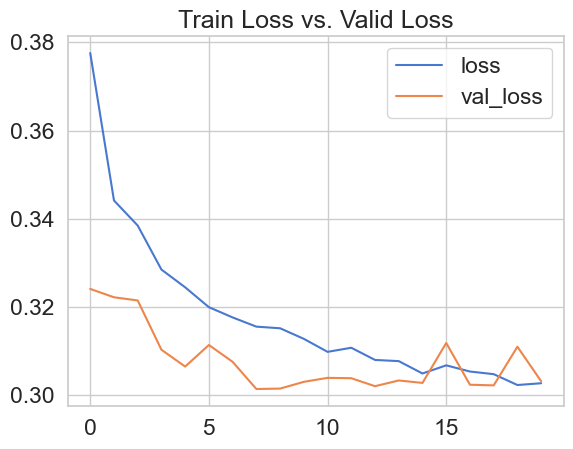

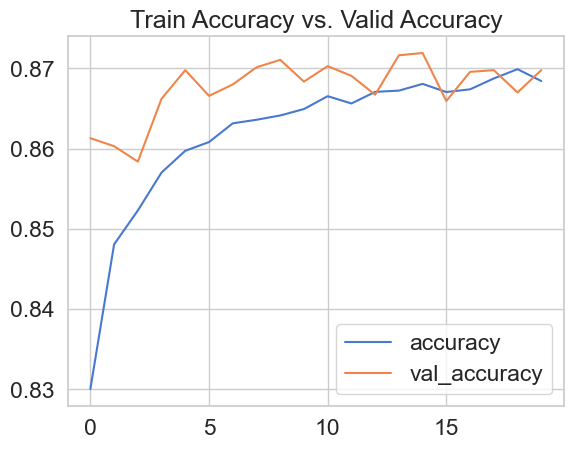

In [523]:
history_df = pd.DataFrame(hist.history)
history_df.loc[0:, ['loss', 'val_loss']].plot(title='Train Loss vs. Valid Loss')
history_df.loc[0:, ['accuracy', 'val_accuracy']].plot(title='Train Accuracy vs. Valid Accuracy');

In [524]:
y_predicted = model.predict(X_test)
y_predicted = [1.0 if y >= 0.5 else 0.0 for y in y_predicted]
df = pd.DataFrame({"Y_test": y_test, "Y_predicted": y_predicted})
df.head(8)

2023-02-11 17:23:09.052869: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


439/439 [==============================] - 2s 3ms/step


,Y_test,Y_predicted
13099,0.0,0.0
32607,0.0,0.0
69261,1.0,1.0
59548,1.0,1.0
21659,0.0,0.0
64087,1.0,0.0
62390,1.0,1.0
2299,0.0,0.0


In [525]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         0.0       0.80      0.98      0.88      7012
         1.0       0.97      0.76      0.85      7027

    accuracy                           0.87     14039
   macro avg       0.89      0.87      0.87     14039
weighted avg       0.89      0.87      0.87     14039



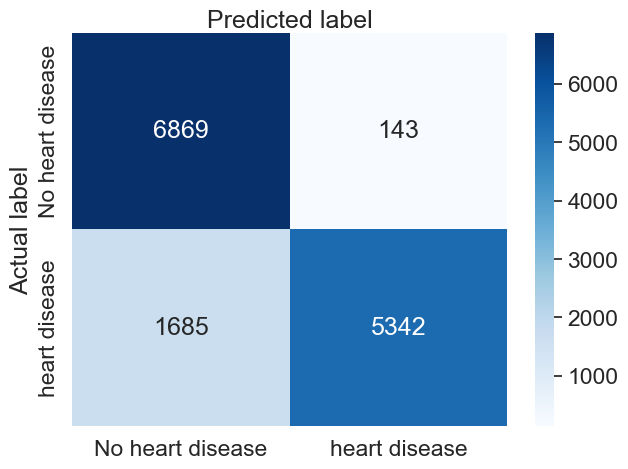

In [526]:
conf_mat = confusion_matrix(y_test, y_predicted)
class_names = ["No heart disease", "heart disease"]

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

df_cm = pd.DataFrame(conf_mat, index=class_names, columns=class_names, )
sns.heatmap(df_cm, annot=True, cmap="Blues", fmt="d")
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.ylabel('Actual label')
plt.xlabel('Predicted label');